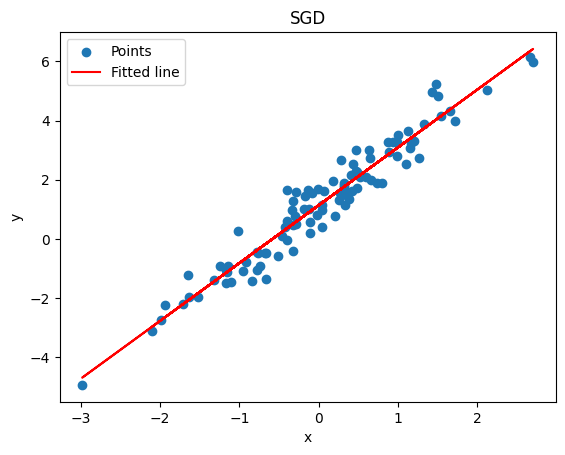

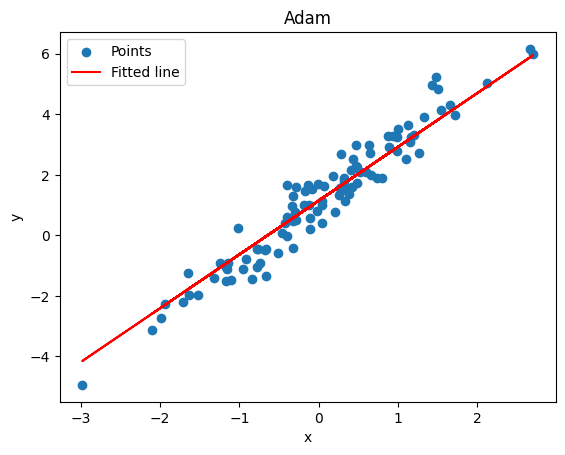

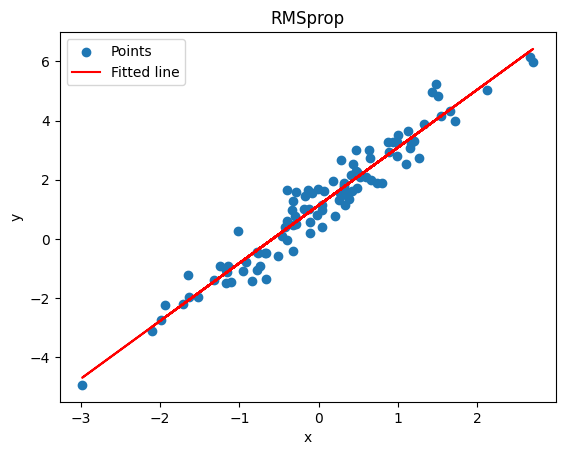

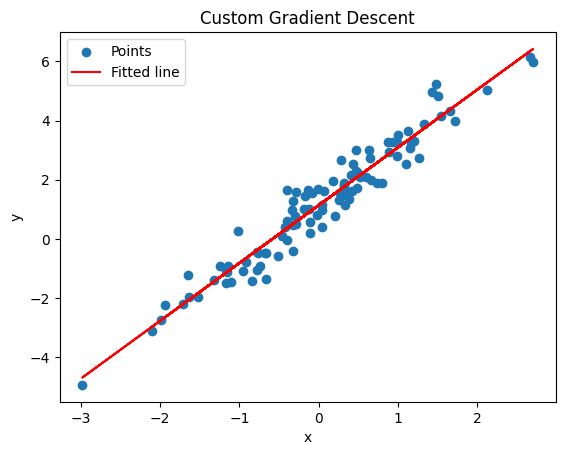

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Функция для генерации случайных точек около прямой y = 2x + 1
def generate_points(n):
    x = torch.randn(n, 1)
    y = 2 * x + 1 + torch.randn(n, 1) * 0.5
    return x, y

# Создание экземпляра модели
class LinearModel(nn.Module):
    def __init__(self, in_features=1, out_features=1):
        super(LinearModel, self).__init__()
        self.fc = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.fc(x)

# Функция для обучения модели и визуализации результатов
def train_and_visualize(optimizer, model, x, y, title):
    losses = []
    for epoch in range(500):
        optimizer.zero_grad()
        output = model(x)
        loss = nn.MSELoss()(output, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    # Визуализация точек и результатов
    plt.scatter(x.numpy(), y.numpy(), label='Points')
    plt.plot(x.numpy(), model(x).detach().numpy(), color='red', label='Fitted line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.show()

# Генерация случайных точек около прямой
x_train, y_train = generate_points(100)

# Создание экземпляров модели и оптимизаторов
model_sgd = LinearModel()
model_adam = LinearModel()
model_rmsprop = LinearModel()

optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.01)
optimizer_rmsprop = optim.RMSprop(model_rmsprop.parameters(), lr=0.01)

# Обучение моделей с использованием разных оптимизаторов и визуализация результатов
train_and_visualize(optimizer_sgd, model_sgd, x_train, y_train, title='SGD')
train_and_visualize(optimizer_adam, model_adam, x_train, y_train, title='Adam')
train_and_visualize(optimizer_rmsprop, model_rmsprop, x_train, y_train, title='RMSprop')

# Класс-обертка для собственного оптимизатора
class CustomOptimizer:
    def __init__(self, params, lr):
        self.params = list(params)
        self.lr = lr

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()

    def step(self):
        for param in self.params:
            if param.grad is not None:
                param.data -= param.grad * self.lr

# Собственный константный градиентный спуск
model_custom = LinearModel()
custom_optimizer = CustomOptimizer(model_custom.parameters(), lr=0.01)

train_and_visualize(custom_optimizer, model_custom, x_train, y_train, title='Custom Gradient Descent')
